<a href="https://colab.research.google.com/github/POPE001/heart-disease-prediction/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Libraries

In [ ]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn


# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,RandomizedSearchCV, learning_curve
from sklearn.metrics import confusion_matrix, classification_report, auc, recall_score, f1_score, precision_score, roc_curve, accuracy_score, precision_recall_curve, average_precision_score
import time



In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#load the dataset
df = pd.read_csv('/content/drive/MyDrive/heartDisease/heart_uci_data.csv')
df.head(10)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# check the dimension of the data
df.shape

(920, 16)

In [ ]:
df.dataset.value_counts()


Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: dataset, dtype: int64

In [ ]:
# Let's find out how many of each classes are there
df.num.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: num, dtype: int64

In [ ]:
df.isna().sum()


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [ ]:
df.describe()


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df.corr(numeric_only=True)


,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


<ipython-input-172-9be95c07be74>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



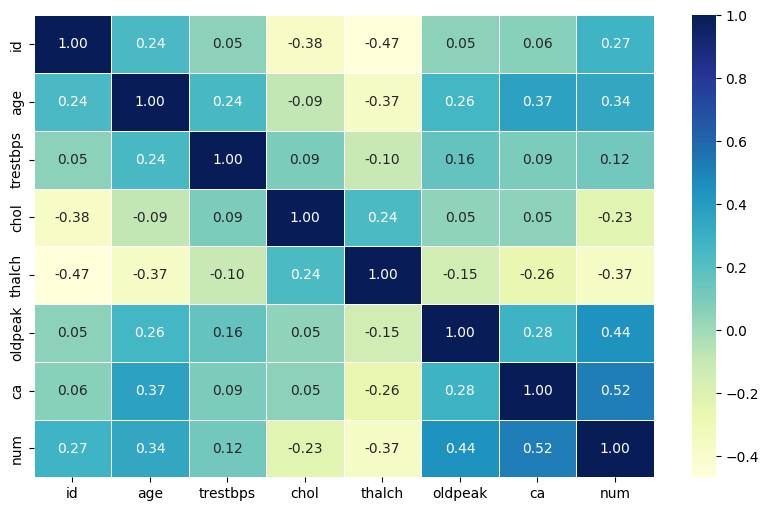

In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,fmt=".2f",
                cmap="YlGnBu")

In [ ]:
df.dropna(inplace = True)
from sklearn.utils import shuffle
data = shuffle(df)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 39 to 4
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [ ]:
#Missing Values after dropping the missing values
data.isna().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
data.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
39,40,61,Male,Cleveland,non-anginal,150.0,243.0,True,normal,137.0,True,1.0,flat,0.0,normal,0
32,33,64,Male,Cleveland,non-anginal,140.0,335.0,False,normal,158.0,False,0.0,upsloping,0.0,normal,1
241,242,41,Female,Cleveland,atypical angina,126.0,306.0,False,normal,163.0,False,0.0,upsloping,0.0,normal,0
14,15,52,Male,Cleveland,non-anginal,172.0,199.0,True,normal,162.0,False,0.5,upsloping,0.0,reversable defect,0
196,197,69,Male,Cleveland,typical angina,160.0,234.0,True,lv hypertrophy,131.0,False,0.1,flat,1.0,normal,0
202,203,57,Male,Cleveland,non-anginal,150.0,126.0,True,normal,173.0,False,0.2,upsloping,1.0,reversable defect,0
52,53,44,Male,Cleveland,asymptomatic,112.0,290.0,False,lv hypertrophy,153.0,False,0.0,upsloping,1.0,normal,2
243,244,61,Male,Cleveland,typical angina,134.0,234.0,False,normal,145.0,False,2.6,flat,2.0,normal,2
65,66,60,Male,Cleveland,asymptomatic,145.0,282.0,False,lv hypertrophy,142.0,True,2.8,flat,2.0,reversable defect,2
195,196,67,Male,Cleveland,asymptomatic,100.0,299.0,False,lv hypertrophy,125.0,True,0.9,flat,2.0,normal,3


# Age Distribution:


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['age'].values , name='Age', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['sex']=='Male']['age'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['sex']=='Female']['age'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'Age', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

#Histogram of the ages.



In [ ]:
group_labels = ['Age Distribution'] # name of the dataset
fig = ff.create_distplot([data.age], group_labels)
fig.update_layout(title = 'Age Distribution(all)', yaxis_title = 'propotion', xaxis_title = 'Age', title_x = 0.5)
fig.show()


##1.4 Male and Female Proportion


In [ ]:
df=data['sex'].value_counts().reset_index().rename(columns={'index':'sex','sex':'count'})
fig = go.Figure([go.Pie(labels=['Male', 'Female'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Male to Female ratio in the study",title_x=0.5)
fig.show()

## Dataset Contributors


In [ ]:
df=data['dataset'].value_counts().reset_index().rename(columns={'index':'dataset','dataset':'count'})
fig = go.Figure([go.Pie(labels=df['dataset'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Dataset Contributors",title_x=0.5)
fig.show()

## CP(Chest Pain Type) Propotions

In [ ]:
df=data['cp'].value_counts().reset_index().rename(columns={'index':'cp','cp':'count'})
fig = go.Figure([go.Pie(labels=df['cp'],values=df['count'], hole = 0.5)])
fig.update_traces(hoverinfo='label+percent', textinfo='value+percent', textfont_size=15,insidetextorientation='radial')
fig.update_layout(title="Chest Pain Conditions",title_x=0.5)
fig.show()

##Resting Blood Pressure vs Gender


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['sex']=='Male']['trestbps'].values, name ='Male only', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['sex']=='Female']['trestbps'].values, name ='Female only', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'BP Distribution', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

 ##Resting Blood Prssure vs Disease

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=data['trestbps'].values , name='BP at Rest for all', marker_color = 'green',boxmean=True))
fig.add_trace(go.Box(y=data[data['num']== 0]['trestbps'].values, name ='No Disease', marker_color = 'blue', boxmean = True))
fig.add_trace(go.Box(y=data[data['num'] !=0]['trestbps'].values, name ='Heart Disease', marker_color = 'red', boxmean = True))
fig.update_layout(title = 'Blood Pressure Distribution At Rest', yaxis_title = 'Blood Pressure (mm/Hg)', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

## Cholesterol Level Distribution

In [ ]:
fig = go.Figure()
fig.add_trace(go.Violin(y=data['chol'].values , name='All Patient', marker_color = 'green'))
fig.add_trace(go.Violin(y=data[data['num']== 0]['chol'].values, name ='No Disease', marker_color = 'blue'))
fig.add_trace(go.Violin(y=data[data['num'] ==4]['chol'].values, name ='Heart Disease', marker_color = 'red'))
fig.update_layout(title = 'Cholesterol Level Distribution', yaxis_title = 'Cholesterol Level', title_x = 0.5)
fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=True)
fig.show()

##Data Pre-Processing


In [ ]:
# In some of the features, there is space will will create problem later on.
# So we rename those attributes to handle problems in the future.

# data["restecg"].replace({"lv hypertrophy": "lv_hypertrophy","st-t abnormality": "stt_abnormality" }, inplace=True)
data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = data[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((data['num'] > 0)*1).copy()
data_tmp['sex'] = (data['sex'] == 'Male')*1
data_tmp['fbs'] = (data['fbs'])*1
data_tmp['exang'] = (data['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina',
              'st_depression', 'st_slope_type', 'num_major_vessels',
              'thalassemia_type', 'target']
data_tmp.head(15)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
39,61,1,non-anginal,150.0,243.0,1,137.0,1,1.0,flat,0.0,normal,0
32,64,1,non-anginal,140.0,335.0,0,158.0,0,0.0,upsloping,0.0,normal,1
241,41,0,atypical_angina,126.0,306.0,0,163.0,0,0.0,upsloping,0.0,normal,0
14,52,1,non-anginal,172.0,199.0,1,162.0,0,0.5,upsloping,0.0,reversable_defect,0
196,69,1,typical_angina,160.0,234.0,1,131.0,0,0.1,flat,1.0,normal,0
202,57,1,non-anginal,150.0,126.0,1,173.0,0,0.2,upsloping,1.0,reversable_defect,0
52,44,1,asymptomatic,112.0,290.0,0,153.0,0,0.0,upsloping,1.0,normal,1
243,61,1,typical_angina,134.0,234.0,0,145.0,0,2.6,flat,2.0,normal,1
65,60,1,asymptomatic,145.0,282.0,0,142.0,1,2.8,flat,2.0,reversable_defect,1
195,67,1,asymptomatic,100.0,299.0,0,125.0,1,0.9,flat,2.0,normal,1


## One-hot Encoding


In [ ]:
data = pd.get_dummies(data_tmp, drop_first=False)
data.columns

<ipython-input-185-698adc0b2566>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-185-698adc0b2566>:1: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

#Logistic Regression
Gathering Data
let us separate the input and labels for the dataset and thus we will be able to put them in the training models.

In [ ]:
y = data['target']
X = data.drop('target', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (239, 21)
Shape of y_train: (239,)
Shape of X_test: (60, 21)
Shape of y_test: (60,)


## Normalization
Min-Max Normalization method is used to Normalize the data. This method scales the data range to [0,1]. Standardization is also used on a feature-wise basis in most cases. Normalization is done by the following formula.
xscaled=(x−xmin)(xmax−xmin)

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.

In [ ]:
X_test

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,chest_pain_type_non-anginal,...,fasting_blood_sugar_0,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
120,0.404255,1.0,0.326087,0.459364,0.504762,0.000000,0.666667,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
26,0.617021,0.0,0.217391,0.756184,0.714286,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
183,0.638298,1.0,0.847826,0.508834,0.457143,1.000000,0.000000,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
182,0.276596,1.0,0.521739,0.416961,0.771429,0.190476,0.666667,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
67,0.531915,1.0,0.543478,0.374558,0.647619,0.380952,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
206,0.617021,1.0,0.304348,0.469965,0.314286,0.714286,0.666667,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
40,0.765957,0.0,0.543478,0.349823,0.161905,0.238095,1.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
255,0.276596,0.0,0.217391,0.293286,0.723810,0.000000,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
257,1.000000,0.0,0.434783,0.250883,0.180952,0.261905,0.000000,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
51,0.765957,1.0,0.217391,0.180212,0.409524,0.095238,0.000000,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:

logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred_logre = logre.predict(X_test)
actual = []
predcition = []
for i,j in zip(y_test,y_pred_logre):
    actual.append(i)
    predcition.append(j)

dic = {'Actual':actual,
       'Prediction':predcition }

result  = pd.DataFrame(dic)
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,    mode='markers',  name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred_logre,  mode='markers',  name='Pred'))


In the referenced figure, the red dots depict the predicted values, which are either 0 or 1, while the blue line and dot signify the actual value associated with a specific patient. Instances where the red and blue dots do not coincide indicate incorrect predictions, whereas overlapping of the two dots denotes accurate predictions.




Model Evaluation


In [ ]:

accuracy_logre = accuracy_score(y_test, y_pred_logre)
print('The Accuracy Score is: ', accuracy_score(y_test,y_pred_logre))

The Accuracy Score is:  0.8666666666666667


## Precision, Recall, F1-Score, Support





In [ ]:

print(classification_report(y_test,y_pred_logre))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



# Confusion Matrix for Logistic Regression


## Area under ROC and ROC Curve


In [ ]:

print('Area Under ROC-Curve: ', sklearn.metrics.roc_auc_score(y_test,y_pred_logre))


Area Under ROC-Curve:  0.8666666666666667


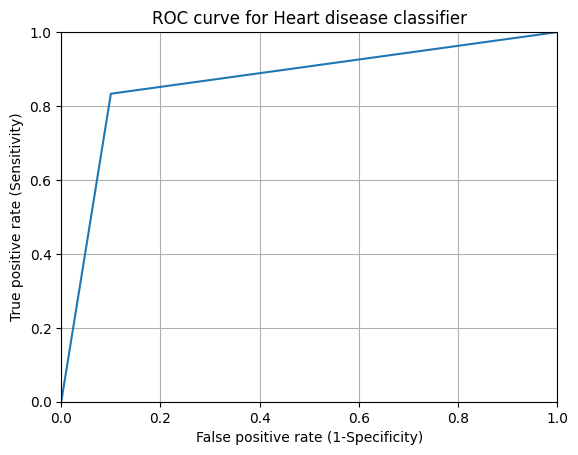

In [ ]:
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logre, drop_intermediate = False)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[-1.67038207]


,Coeffecient
num_major_vessels,2.135159
st_depression,1.343063
chest_pain_type_asymptomatic,1.103621
sex,0.985260
resting_blood_pressure,0.968063
thalassemia_type_reversable_defect,0.789488
exercise_induced_angina_1,0.351754
age,0.295614
st_slope_type_flat,0.276069
cholesterol,0.269398


<Figure size 1000x1200 with 0 Axes>

In [ ]:
# Decision Trees

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")


Decision Tree Accuracy: 0.6833333333333333


### Random Forest


In [ ]:

# Random Forest
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.85


## Support Vector Machine

In [ ]:

# Support Vector Machine
clf_svc = SVC(random_state=42)
clf_svc.fit(X_train, y_train)
y_pred_svc = clf_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc}")

SVM Accuracy: 0.8


## Neural Network

In [ ]:
# Initialize the model
model_nn = Sequential()
print("Type of Neural Network model:", type(model_nn))

# Add layers to the model
# Set input_dim to 21 to match the number of features in your input data
model_nn.add(Dense(units=64, activation='relu', input_dim=21))
model_nn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_nn.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# Use 20% of training data for validation
history = model_nn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

# Evaluate the model on the test data
_, accuracy_nn = model_nn.evaluate(X_test, y_test)
print(f"Neural Network Accuracy: {accuracy_nn}")



Type of Neural Network model: <class 'keras.src.engine.sequential.Sequential'>
Epoch 1/10
6/6 [==============================] - 1s 46ms/step - loss: 0.6344 - accuracy: 0.6963 - val_loss: 0.6335 - val_accuracy: 0.7500
Epoch 2/10
6/6 [==============================] - 0s 11ms/step - loss: 0.6253 - accuracy: 0.7277 - val_loss: 0.6238 - val_accuracy: 0.7917
Epoch 3/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6167 - accuracy: 0.7382 - val_loss: 0.6147 - val_accuracy: 0.7708
Epoch 4/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6085 - accuracy: 0.7382 - val_loss: 0.6060 - val_accuracy: 0.7917
Epoch 5/10
6/6 [==============================] - 0s 8ms/step - loss: 0.6005 - accuracy: 0.7487 - val_loss: 0.5977 - val_accuracy: 0.7500
Epoch 6/10
6/6 [==============================] - 0s 9ms/step - loss: 0.5936 - accuracy: 0.7696 - val_loss: 0.5896 - val_accuracy: 0.7500
Epoch 7/10
6/6 [==============================] - 0s 12ms/step - loss: 0.5861 - accuracy: 0

In [ ]:
# Extract training and validation accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_acc) + 1)



## Compare Models

In [ ]:
model_accuracies = {
    'Logistic Regression': accuracy_logre,
    'Decision Trees': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Support Vector Machine': accuracy_svc,
    'Neural Network': accuracy_nn
}

print("Model Comparison:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy}")


Model Comparison:
Logistic Regression: 0.8666666666666667
Decision Trees: 0.6833333333333333
Random Forest: 0.85
Support Vector Machine: 0.8
Neural Network: 0.800000011920929


##Evaluations

In [ ]:
# Define a function to plot the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


In [ ]:

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Neural Network': model_nn  # Ensure that the 'model' here is your Neural Network model
}

# Print the types of models to verify
print({name: type(model) for name, model in models.items()})


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


{'Logistic Regression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'Decision Trees': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'Random Forest': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'Support Vector Machine': <class 'sklearn.svm._classes.SVC'>, 'Neural Network': <class 'keras.src.engine.sequential.Sequential'>}


{'Logistic Regression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'Decision Trees': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'Random Forest': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'Support Vector Machine': <class 'sklearn.svm._classes.SVC'>, 'Neural Network': <class 'keras.src.engine.sequential.Sequential'>}

Logistic Regression:
Type of model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Confusion Matrix:
[[27  3]
 [ 5 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



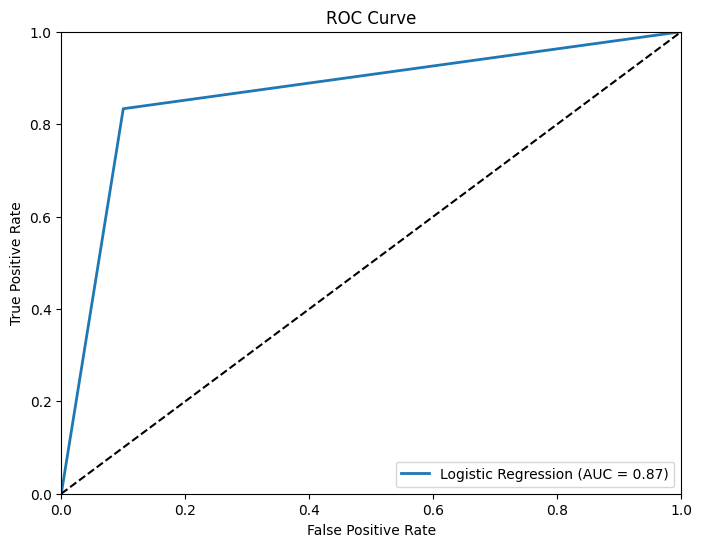

Sensitivity: 0.83
Specificity: 0.90
Training Time: 0.02 seconds
Prediction Time: 0.00 seconds

Decision Trees:
Type of model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Confusion Matrix:
[[23  7]
 [ 6 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78        30
           1       0.77      0.80      0.79        30

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



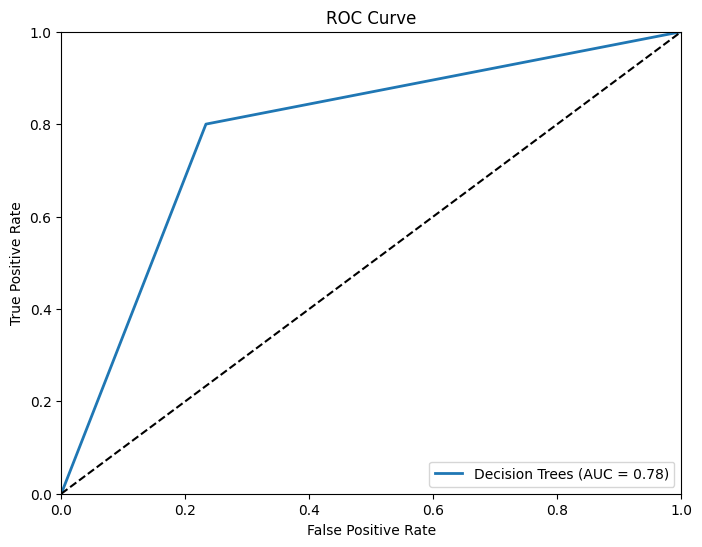

Sensitivity: 0.80
Specificity: 0.77
Training Time: 0.00 seconds
Prediction Time: 0.00 seconds

Random Forest:
Type of model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>
Confusion Matrix:
[[26  4]
 [ 5 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        30
           1       0.86      0.83      0.85        30

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



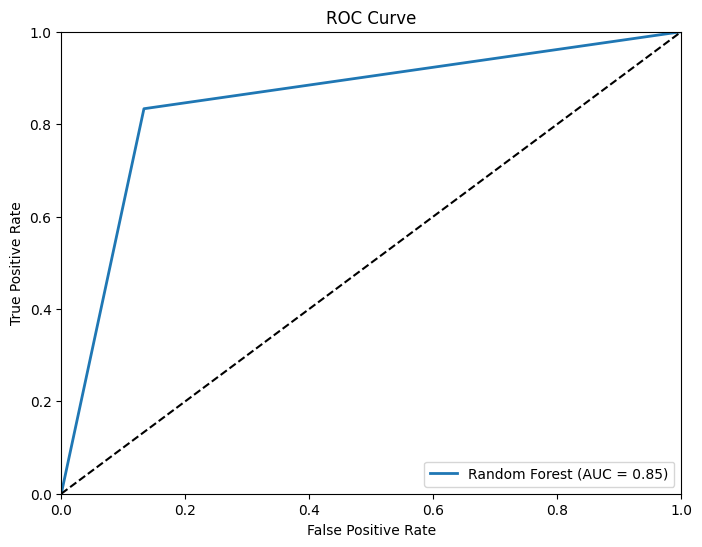

Sensitivity: 0.83
Specificity: 0.87
Training Time: 0.31 seconds
Prediction Time: 0.02 seconds

Support Vector Machine:
Type of model: <class 'sklearn.svm._classes.SVC'>
Confusion Matrix:
[[25  5]
 [ 7 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.82      0.77      0.79        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



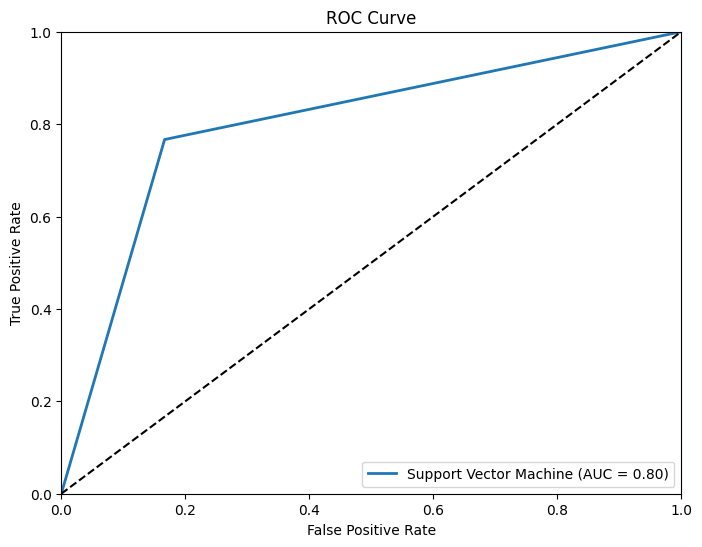

Sensitivity: 0.77
Specificity: 0.83
Training Time: 0.02 seconds
Prediction Time: 0.00 seconds

Neural Network:
Type of model: <class 'keras.src.engine.sequential.Sequential'>
2/2 [==============================] - 0s 5ms/step
Confusion Matrix:
[[25  5]
 [ 7 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        30
           1       0.82      0.77      0.79        30

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



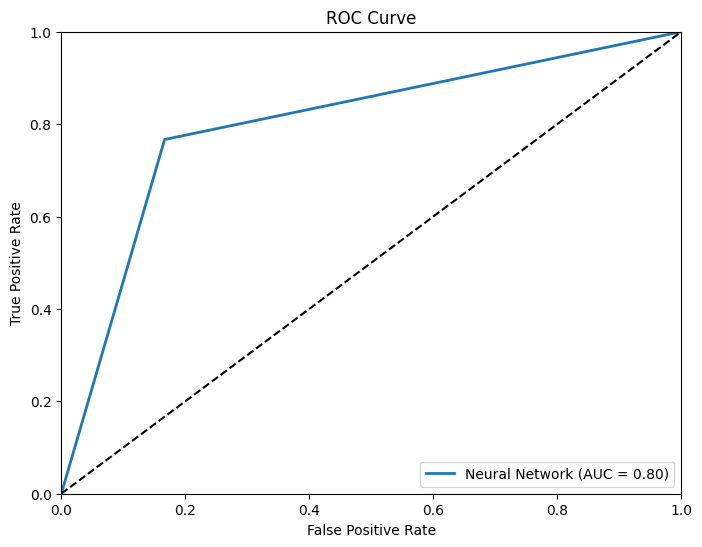

Sensitivity: 0.77
Specificity: 0.83
Training Time: 0.20 seconds
Prediction Time: 0.22 seconds


In [ ]:

# Iterate through models and evaluate their performance
print({name: type(model) for name, model in models.items()})

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print(f"Type of model: {type(model)}")  # Add this line for debugging

    # Time the training of the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Time the prediction
    start_time = time.time()
    y_pred_proba = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Threshold the probabilities to get binary predictions
    threshold = 0.5
    y_pred = (y_pred_proba >= threshold).astype(int)


    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)

    # ROC Curve and AUC Score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plot_roc_curve(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.legend(loc='lower right')
    plt.show()

    # Sensitivity and Specificity
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f"Sensitivity: {sensitivity:.2f}")
    print(f"Specificity: {specificity:.2f}")

    # Computing Efficiency
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"Prediction Time: {prediction_time:.2f} seconds")


{'Logistic Regression': <class 'sklearn.linear_model._logistic.LogisticRegression'>, 'Decision Trees': <class 'sklearn.tree._classes.DecisionTreeClassifier'>, 'Random Forest': <class 'sklearn.ensemble._forest.RandomForestClassifier'>, 'Support Vector Machine': <class 'sklearn.svm._classes.SVC'>, 'Neural Network': <class 'keras.src.engine.sequential.Sequential'>}

Logistic Regression:
Type of model: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Confusion Matrix:
[[27  3]
 [ 5 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.89      0.83      0.86        30

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60


Decision Trees:
Type of model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Confusion Matrix:
[[22  8]
 [ 5 25]]
Classification Report:
    

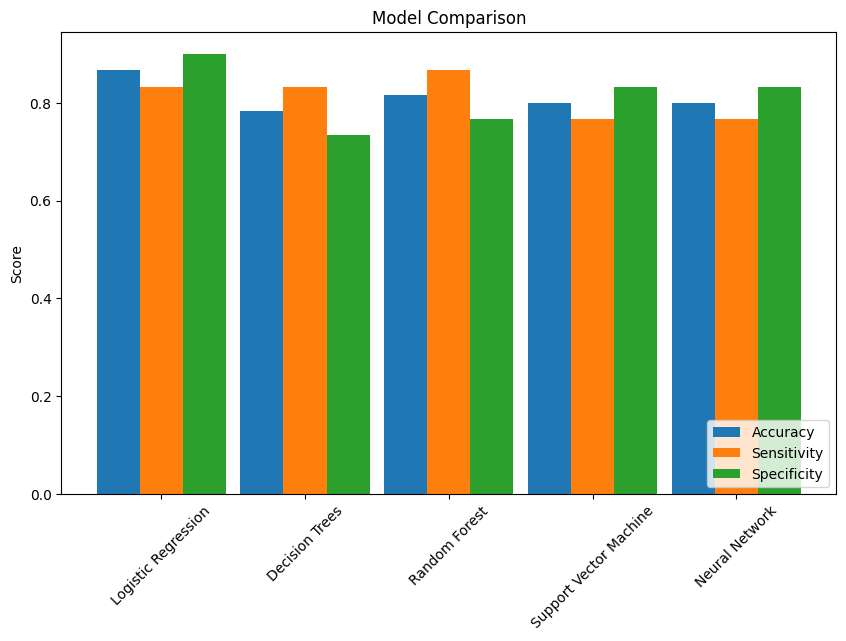

In [ ]:

# Assuming models is a dictionary containing your model objects
print({name: type(model) for name, model in models.items()})

# Initialize lists to save metrics
model_names = []
accuracies = []
sensitivities = []
specificities = []
training_times = []
prediction_times = []

for model_name, model in models.items():
    print(f"\n{model_name}:")
    print(f"Type of model: {type(model)}")

    # Time the training of the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Time the prediction
    start_time = time.time()
    y_pred_proba = model.predict(X_test)
    prediction_time = time.time() - start_time

    # Threshold the probabilities to get binary predictions
    threshold = 0.5
    y_pred = (y_pred_proba >= threshold).astype(int)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)

    # Calculate Accuracy, Sensitivity, and Specificity
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Save metrics for later plotting
    model_names.append(model_name)
    accuracies.append(accuracy)
    sensitivities.append(sensitivity)
    specificities.append(specificity)
    training_times.append(training_time)
    prediction_times.append(prediction_time)

# Plot Accuracy, Sensitivity, and Specificity for all models
x = np.arange(len(model_names))  # the label locations
width = 0.3  # the width of the bars

plt.figure(figsize=(10,6))

# Plotting the bars
plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, sensitivities, width, label='Sensitivity')
plt.bar(x + width, specificities, width, label='Specificity')

# Adding labels, title, and legend
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, model_names, rotation=45)
plt.legend(loc='lower right')

# Display the plot
plt.show()


Computation Efficiency and Predicting Time


Logistic Regression:
Type of model: <class 'sklearn.linear_model._logistic.LogisticRegression'>

Decision Trees:
Type of model: <class 'sklearn.tree._classes.DecisionTreeClassifier'>

Random Forest:
Type of model: <class 'sklearn.ensemble._forest.RandomForestClassifier'>

Support Vector Machine:
Type of model: <class 'sklearn.svm._classes.SVC'>

Neural Network:
Type of model: <class 'keras.src.engine.sequential.Sequential'>
2/2 [==============================] - 0s 9ms/step


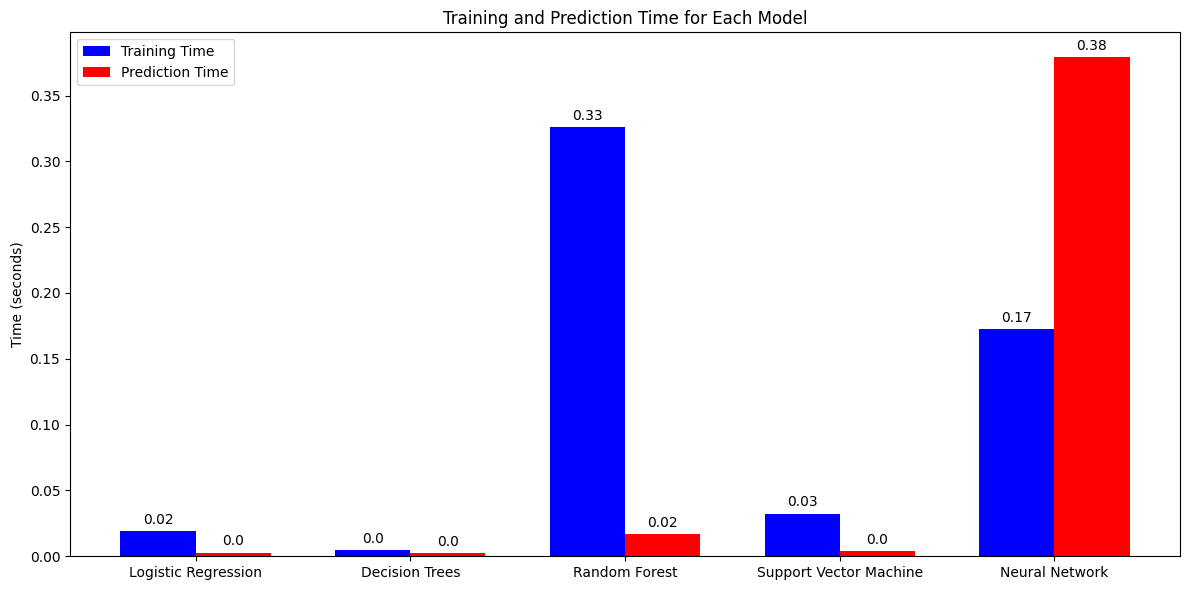

In [ ]:
# Initialize dictionaries to store training and prediction times
training_times = {}
prediction_times = {}

# Iterate through models and evaluate their performance
for model_name, model in models.items():
    print(f"\n{model_name}:")
    print(f"Type of model: {type(model)}")

    # Time the training of the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_times[model_name] = time.time() - start_time

    # Time the prediction
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_times[model_name] = time.time() - start_time


# Create grouped bar plot for training and prediction times
labels = list(training_times.keys())
training_vals = list(training_times.values())
prediction_vals = list(prediction_times.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(x - width/2, training_vals, width, label='Training Time', color='b')
rects2 = ax.bar(x + width/2, prediction_vals, width, label='Prediction Time', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Time (seconds)')
ax.set_title('Training and Prediction Time for Each Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Autolabel function to display the label on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()


##Feature Importance Plot

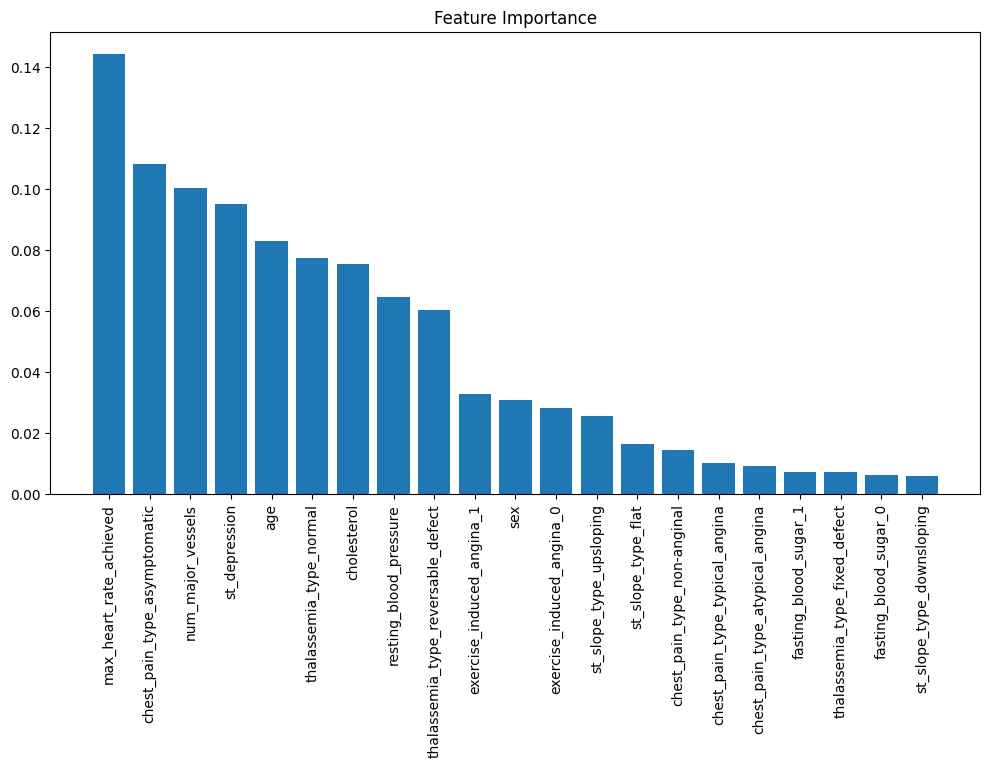

In [ ]:
importances = clf_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()


##Learning Curve

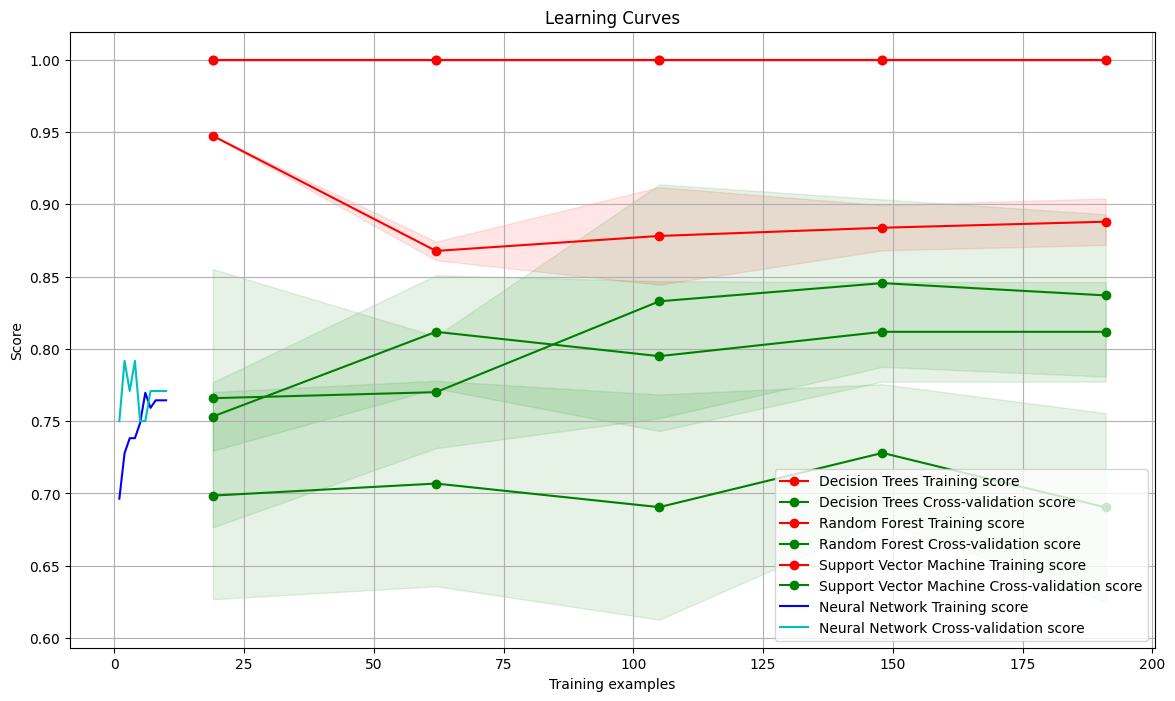

In [ ]:
def plot_learning_curve(estimator, title, X, y, ax=None, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if ax is None:
        ax = plt.gca()
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label=f"{title} Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label=f"{title} Cross-validation score")

    return ax

plt.figure(figsize=(14, 8))

# Ensure that train_acc and val_acc are defined as the training and validation accuracies for Neural Network
# For example:
# train_acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
epochs = np.arange(1, 11)  # Assuming you trained for 10 epochs

# Plot learning curve for Decision Tree
plot_learning_curve(clf_dt, "Decision Trees", X_train, y_train, cv=5)

# Plot learning curve for Random Forest
plot_learning_curve(clf_rf, "Random Forest", X_train, y_train, cv=5)

# Plot learning curve for Support Vector Machine
plot_learning_curve(clf_svc, "Support Vector Machine", X_train, y_train, cv=5)

# Plot learning curve for Neural Network
plt.plot(epochs, train_acc, 'b-', label='Neural Network Training score')
plt.plot(epochs, val_acc, 'c-', label='Neural Network Cross-validation score')

plt.title("Learning Curves")
plt.legend(loc="best")
plt.grid(True)
plt.show()


##Precision-Recall Curve

Text(0.5, 1.0, 'Precision-Recall curve: AP=0.90')

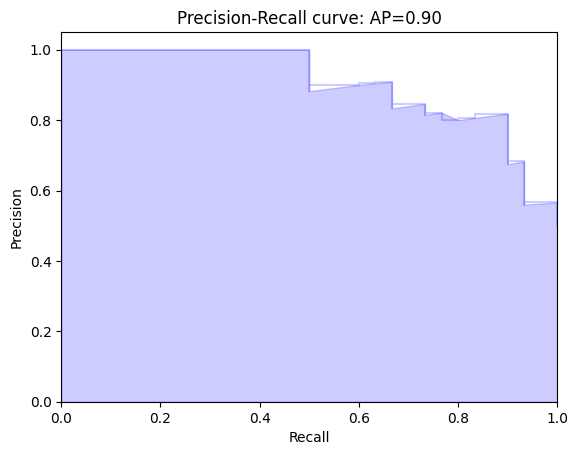

In [ ]:


# For example, for Random Forest
y_scores_rf = clf_rf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores_rf)
average_precision = average_precision_score(y_test, y_scores_rf)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


##Model Comparison

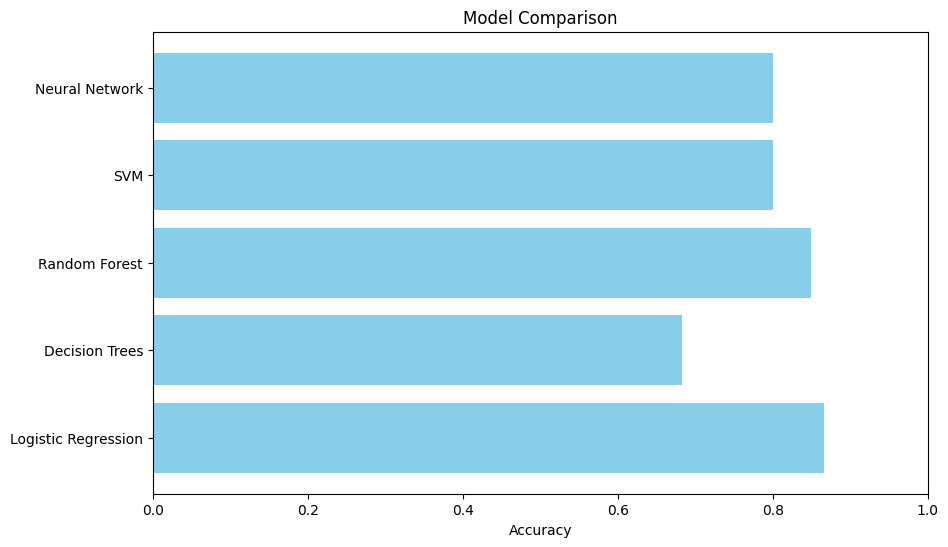

In [ ]:
model_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'SVM', 'Neural Network']
accuracies = [accuracy_logre, accuracy_dt, accuracy_rf, accuracy_svc, accuracy_nn]
plt.figure(figsize=(10,6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1)
plt.show()


##Confusion Matrix for Decision Tree

[[19 11]
 [ 8 22]]


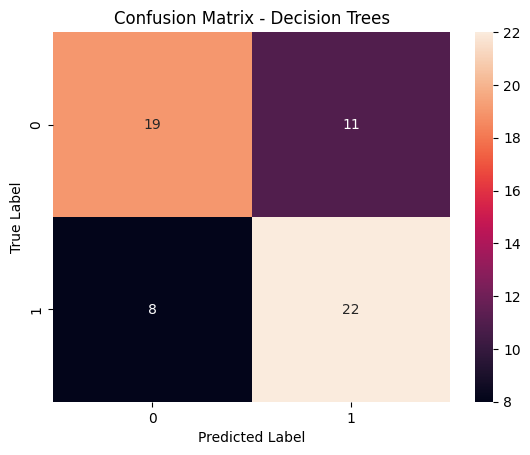

In [ ]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matrix_dt)

# Visualize the confusion matrix using Seaborn heatmap
sns.heatmap(conf_matrix_dt, annot=True, fmt="d")
plt.title("Confusion Matrix - Decision Trees")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Confusion Matrix for Random Forest

[[24  6]
 [ 3 27]]


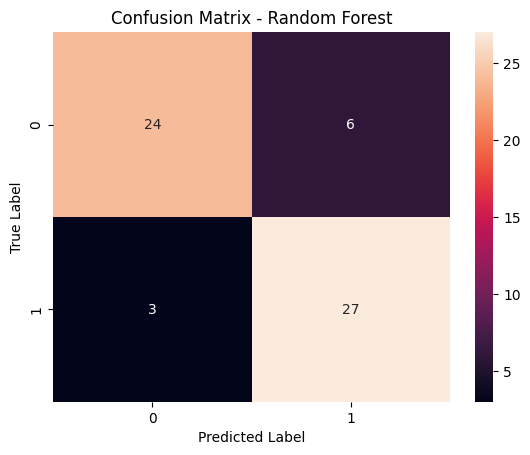

In [ ]:
# Compute the confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print(conf_matrix_rf)

# Visualize the confusion matrix using Seaborn heatmap
sns.heatmap(conf_matrix_rf, annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Confusion Matrix for SVM





[[25  5]
 [ 7 23]]


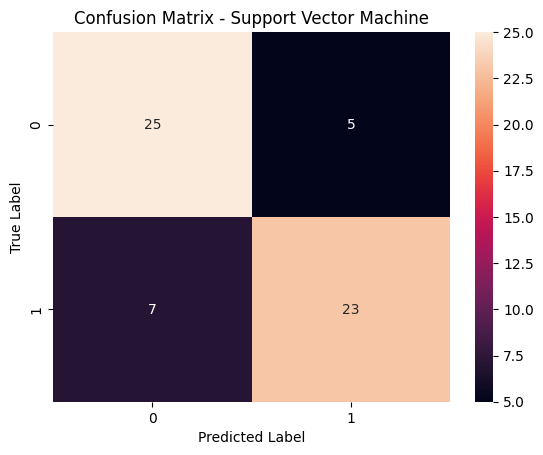

In [ ]:
# Compute the confusion matrix for Support Vector Machine
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(conf_matrix_svc)

# Visualize the confusion matrix using Seaborn heatmap
sns.heatmap(conf_matrix_svc, annot=True, fmt="d")
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##Confusion Matrix for NN

2/2 [==============================] - 0s 8ms/step
[[25  5]
 [ 7 23]]


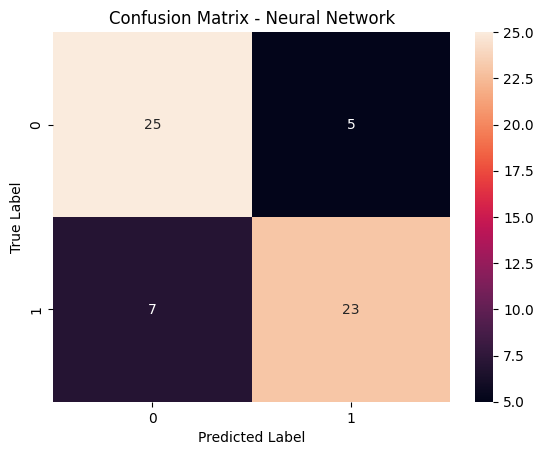

In [ ]:
# Predict the probabilities for the test data
y_pred_probs_nn = model_nn.predict(X_test)

# Convert probabilities to binary class labels
y_pred_nn = np.round(y_pred_probs_nn)

# Compute the confusion matrix for Neural Network
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
print(conf_matrix_nn)

sns.heatmap(conf_matrix_nn, annot=True, fmt="d")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


#Confusion Matrix for Logistic Regression

[[27  3]
 [ 5 25]]


<Axes: >

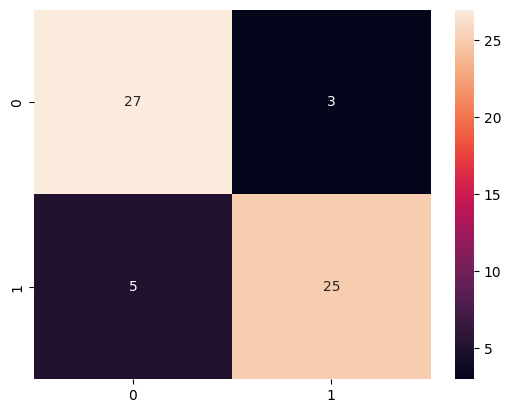

In [ ]:

print(confusion_matrix(y_test,y_pred_logre))
sns.heatmap(confusion_matrix(y_test,y_pred_logre),annot=True)